# School Data

In [137]:
# import Pandas

import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [55]:
# Read in csvs
file_path1 = "Resources/schools_complete.csv"
file_path2 = "Resources/students_complete.csv"

# Set csvs to dataframes
schools_df = pd.read_csv(file_path1)
students_df = pd.read_csv(file_path2)

In [56]:
# List column names
schools_df.columns

Index(['School ID', 'school_name', 'type', 'size', 'budget'], dtype='object')

In [57]:
# List column names
students_df.columns

Index(['Student ID', 'student_name', 'gender', 'grade', 'school_name',
       'reading_score', 'math_score'],
      dtype='object')

In [58]:
# Calculate Summary Statistics for District

Total_Schools = len(schools_df)
Total_Students = len(students_df)
Total_Budget = schools_df["budget"].sum()
Average_Math_Score = students_df["math_score"].mean()
Average_Reading_Score = students_df["reading_score"].mean()
Percent_Passing_Math = (students_df["math_score"][students_df["math_score"] >= 70].count() / Total_Students) * 100
Percent_Passing_Reading = (students_df["reading_score"][students_df["reading_score"] >= 70].count() / Total_Students) * 100
Overall_Passing_Rate = (Percent_Passing_Math + Percent_Passing_Reading) / 2

In [59]:
# set Summary Statistics to a dataframe
District_Summary_df = pd.DataFrame({"Total Schools": [Total_Schools],
                                   "Total Students": [Total_Students],
                                   "Total Budget": [Total_Budget],
                                   "Average Math Score": [Average_Math_Score],
                                   "Average Reading Score": [Average_Reading_Score],
                                   "% Passing Math": [Percent_Passing_Math],
                                   "% Passing Reading": [Percent_Passing_Reading],
                                   "Overall Passing Rate": [Overall_Passing_Rate]})

In [60]:
# Add commas and dollar sign to students and Budget
District_Summary_df["Total Students"] = District_Summary_df["Total Students"].map("{:,}".format)
District_Summary_df["Total Budget"] = District_Summary_df["Total Budget"].map("${:,}".format)
District_Summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,15,"39,170","$24,649,428",78.985371,81.87784,74.980853,85.805463,80.393158


In [61]:
# Make a copy of schools_df
schools2_df = schools_df.copy()

# Remove School ID column
del schools2_df["School ID"]

# Rename columns
schools2_df.rename(columns={'school_name':'School Name', 'type': 'School Type', 'size': 'Total Students',
                                  'budget': 'Total School Budget'}, inplace=True)

# Add per Student Budget column
schools2_df["Per Student Budget"] = schools2_df["Total School Budget"] / schools2_df["Total Students"]

# Make a copy of students_df
students2_df = students_df.copy()

# Rename columns
students2_df.rename(columns={'school_name': 'School Name'}, inplace=True)

# Group by School Name
students2_df = students2_df.groupby(["School Name"]).mean()

# Remove Student ID column
del students2_df["Student ID"]

# Rename columns
students2_df.rename(columns={'math_score': 'Average Math Score',
                             'reading_score': 'Average Reading Score'}, inplace=True)

# Merge schools2_df and students2_df
School_Summary_df = pd.merge(schools2_df, students2_df, on="School Name")

In [62]:
# Make a copy of students_df
students3_df = students_df.copy()

# Rename columns
students3_df.rename(columns={"school_name": "School Name"}, inplace=True)

# Calculate number of students passing math and reading
Passing_math = students3_df["School Name"][students3_df["math_score"] >= 70].value_counts().rename_axis("School Name").reset_index(name = "Passingmath")

Passing_reading = students3_df["School Name"][students3_df["reading_score"] >= 70].value_counts().rename_axis("School Name").reset_index(name = "Passingreading")

# Merge students passing math into School_Summary_df
School_Summary_df = pd.merge(School_Summary_df, Passing_math, on="School Name")

# Calculate the percentage of students passing math
School_Summary_df["% Passing Math"] = (School_Summary_df["Passingmath"] / School_Summary_df["Total Students"]) * 100


# Merge students passing reading into School_Summary_df
School_Summary_df = pd.merge(School_Summary_df, Passing_reading, on = "School Name")

#Calculate the percentage of students passing reading
School_Summary_df["% Passing Reading"] = (School_Summary_df["Passingreading"] / School_Summary_df["Total Students"]) * 100

# Remove the number of students passing math and the number of students passing reading columns
School_Summary_df.drop(columns=["Passingmath", "Passingreading"], inplace=True)


# Calculate the average passing rate
School_Summary_df["Overall Passing Rate"] = (School_Summary_df["% Passing Math"] + School_Summary_df["% Passing Reading"]) / 2

# Reorder the columns
School_Summary_df = School_Summary_df.reindex(columns= ["School Name", "School Type", "Total Students",
                                                        "Total School Budget", "Per Student Budget", "Average Math Score",
                                                        "Average Reading Score", "% Passing Math", "% Passing Reading",
                                                        "Overall Passing Rate"])
# Set index to School Name
School_Summary_df = School_Summary_df.set_index("School Name")

In [72]:
School_Summary_plot = School_Summary_df.copy()

In [10]:
# Add commas and dollar sign to Total Budget and Per Student Budget
School_Summary_df["Total School Budget"] = School_Summary_df["Total School Budget"].map("${:,}".format)
School_Summary_df["Per Student Budget"] = School_Summary_df["Per Student Budget"].map("${:,}".format)
School_Summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Name,,,,,,,,,
Huang High School,District,2917,"$1,910,635",$655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Figueroa High School,District,2949,"$1,884,411",$639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Shelton High School,Charter,1761,"$1,056,600",$600.0,83.359455,83.725724,93.867121,95.854628,94.860875
Hernandez High School,District,4635,"$3,022,020",$652.0,77.289752,80.934412,66.752967,80.862999,73.807983
Griffin High School,Charter,1468,"$917,500",$625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,Charter,2283,"$1,319,574",$578.0,83.274201,83.989488,93.867718,96.539641,95.203679
Cabrera High School,Charter,1858,"$1,081,356",$582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Bailey High School,District,4976,"$3,124,928",$628.0,77.048432,81.033963,66.680064,81.933280,74.306672
Holden High School,Charter,427,"$248,087",$581.0,83.803279,83.814988,92.505855,96.252927,94.379391


In [11]:
# List top 5 performing schools descending
Top_Performing_Schools_df = School_Summary_df.sort_values("Overall Passing Rate", ascending=False)
Top_Performing_Schools_df.iloc[0:5,:]

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356",$582.0,83.061895,83.975780,94.133477,97.039828,95.586652
Thomas High School,Charter,1635,"$1,043,130",$638.0,83.418349,83.848930,93.272171,97.308869,95.290520
Pena High School,Charter,962,"$585,858",$609.0,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,Charter,1468,"$917,500",$625.0,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,Charter,2283,"$1,319,574",$578.0,83.274201,83.989488,93.867718,96.539641,95.203679


In [12]:
# List bottom 5 performing schools ascending
Bottom_Performing_Schools_df = School_Summary_df.sort_values("Overall Passing Rate", ascending=True)
Bottom_Performing_Schools_df.iloc[0:5,:]

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363",$637.0,76.842711,80.744686,66.366592,80.220055,73.293323
Figueroa High School,District,2949,"$1,884,411",$639.0,76.711767,81.158020,65.988471,80.739234,73.363852
Huang High School,District,2917,"$1,910,635",$655.0,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,"$3,094,650",$650.0,77.072464,80.966394,66.057551,81.222432,73.639992
Ford High School,District,2739,"$1,763,916",$644.0,77.102592,80.746258,68.309602,79.299014,73.804308


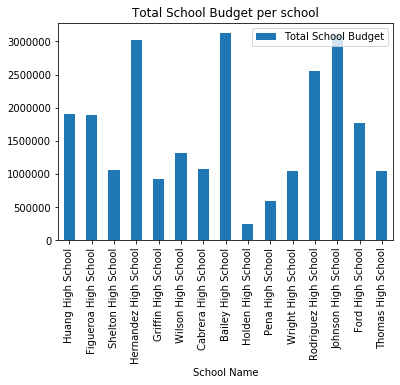

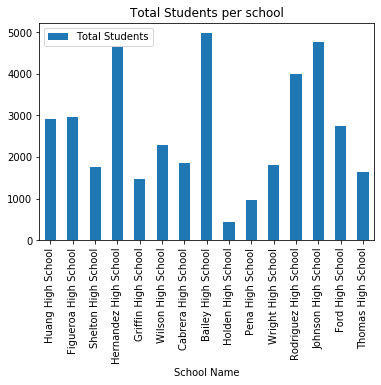

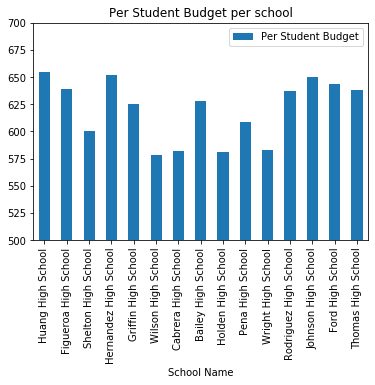

In [118]:
School_Summary_plot.plot(kind="bar", y="Total School Budget", title="Total School Budget per school")
School_Summary_plot.plot(kind="bar", y="Total Students", title="Total Students per school")
School_Summary_plot.plot(kind="bar", y="Per Student Budget", title="Per Student Budget per school", ylim=(500,700))

-0.7948122202930927
-0.8001178148393907


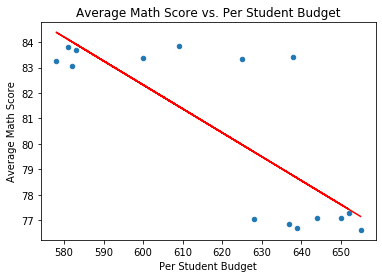

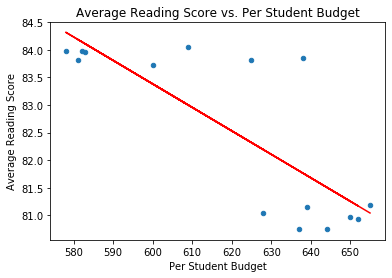

In [141]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(School_Summary_plot["Per Student Budget"],
                                                        School_Summary_plot["Average Math Score"])
regress_values = slope*School_Summary_plot["Per Student Budget"] + intercept

School_Summary_plot.plot(kind="scatter", x="Per Student Budget", y="Average Math Score",
                         title="Average Math Score vs. Per Student Budget")
plt.plot(School_Summary_plot["Per Student Budget"], regress_values, "r-")


(slope, intercept, rvalue, pvalue, stderr) = linregress(School_Summary_plot["Per Student Budget"],
                                                        School_Summary_plot["Average Reading Score"])
regress_values = slope*School_Summary_plot["Per Student Budget"] + intercept

School_Summary_plot.plot(kind="scatter", x="Per Student Budget", y="Average Reading Score",
                         title="Average Reading Score vs. Per Student Budget")
plt.plot(School_Summary_plot["Per Student Budget"], regress_values, "r-")
print(rvalue)

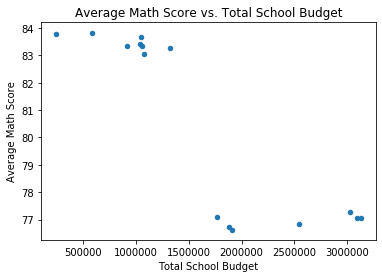

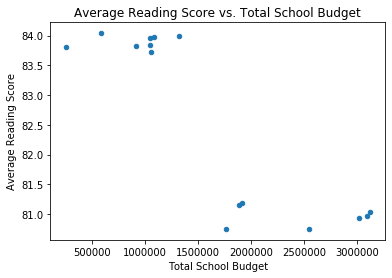

In [129]:
School_Summary_plot.plot(kind="scatter", x="Total School Budget", y="Average Math Score",
                         title="Average Math Score vs. Total School Budget")
School_Summary_plot.plot(kind="scatter", x="Total School Budget", y="Average Reading Score",
                         title="Average Reading Score vs. Total School Budget")

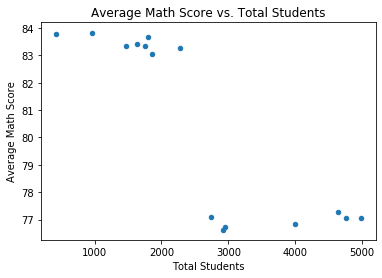

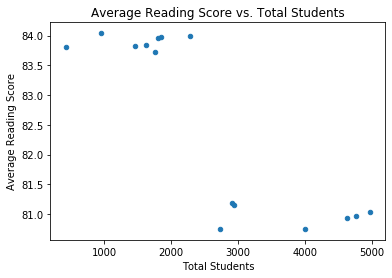

In [132]:
School_Summary_plot.plot(kind="scatter", x="Total Students", y="Average Math Score",
                         title="Average Math Score vs. Total Students")
School_Summary_plot.plot(kind="scatter", x="Total Students", y="Average Reading Score",
                         title="Average Reading Score vs. Total Students")

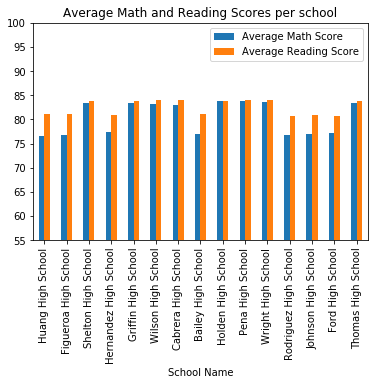

In [123]:
School_Summary_plot.plot(kind="bar", y=["Average Math Score", "Average Reading Score"],
                         title="Average Math and Reading Scores per school", ylim=(55,100))

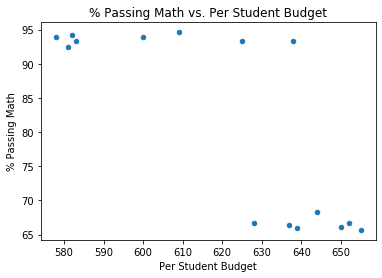

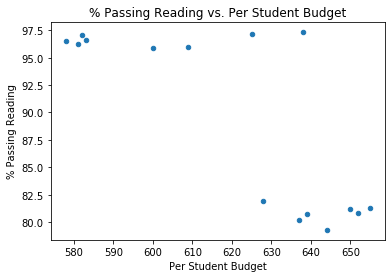

In [130]:
School_Summary_plot.plot(kind="scatter", x="Per Student Budget", y="% Passing Math",
                         title="% Passing Math vs. Per Student Budget")
School_Summary_plot.plot(kind="scatter", x="Per Student Budget", y="% Passing Reading",
                         title="% Passing Reading vs. Per Student Budget")

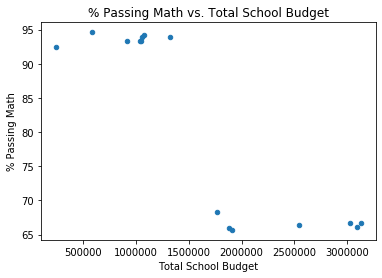

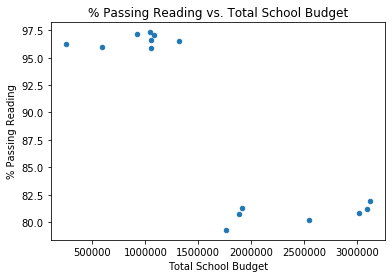

In [134]:
School_Summary_plot.plot(kind="scatter", x="Total School Budget", y="% Passing Math",
                         title="% Passing Math vs. Total School Budget")
School_Summary_plot.plot(kind="scatter", x="Total School Budget", y="% Passing Reading",
                         title="% Passing Reading vs. Total School Budget")

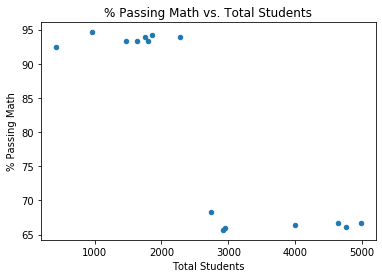

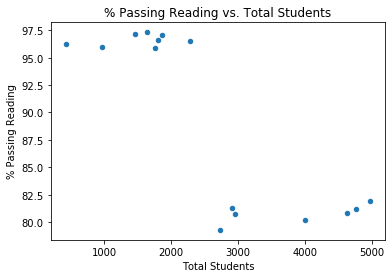

In [133]:
School_Summary_plot.plot(kind="scatter", x="Total Students", y="% Passing Math",
                         title="% Passing Math vs. Total Students")
School_Summary_plot.plot(kind="scatter", x="Total Students", y="% Passing Reading",
                         title="% Passing Reading vs. Total Students")

In [13]:
# Calculate average math scores for grade 9
# Make a copy of students_df
students4_df = students_df.copy()

# Reduce columns
students4_df = students4_df[["grade","school_name", "math_score"]]

# Rename columns
students4_df.rename(columns={"school_name":"School Name"}, inplace=True)

# Filter for only grade 9
students4_df = students4_df.loc[students4_df["grade"] == "9th",:]

# Remove grade column
del students4_df["grade"]

# Groupby School Name
students4_df = students4_df.groupby(["School Name"]).mean()

# Rename columns
students4_df.rename(columns={"math_score": "9th"}, inplace=True)

In [14]:
# Calculate average math scores for grade 10
# Make a copy of students_df
students5_df = students_df.copy()

# Reduce columns
students5_df = students5_df[["grade","school_name", "math_score"]]

# Rename columns
students5_df.rename(columns={"school_name":"School Name"}, inplace=True)

# Filter for only grade 10
students5_df = students5_df.loc[students5_df["grade"] == "10th",:]

# Remove grade column
del students5_df["grade"]

# Groupby School Name
students5_df = students5_df.groupby(["School Name"]).mean()

# Rename columns
students5_df.rename(columns={"math_score": "10th"}, inplace=True)

# Merge average math scores for grade 9 and 10
Math_Scores_by_Grade_df = pd.merge(students4_df, students5_df, on="School Name")

In [15]:
# Calculate average math scores for grade 11
# Make a copy of students_df
students6_df = students_df.copy()

# Reduce columns
students6_df = students6_df[["grade","school_name", "math_score"]]

# Rename columns
students6_df.rename(columns={"school_name":"School Name"}, inplace=True)

# Filter for only grade 11
students6_df = students6_df.loc[students6_df["grade"] == "11th",:]

# Remove grade column
del students6_df["grade"]

# Groupby School Name
students6_df = students6_df.groupby(["School Name"]).mean()

# Rename Columns
students6_df.rename(columns={"math_score": "11th"}, inplace=True)

# Merge average math scores for grades 9 and 10 and 11
Math_Scores_by_Grade_df = pd.merge(Math_Scores_by_Grade_df, students6_df, on="School Name")

In [16]:
# Calculate average math scores for grade 12
# Make a copy of students_df
students7_df = students_df.copy()

# Reduce columns
students7_df = students7_df[["grade","school_name", "math_score"]]

# Rename columns
students7_df.rename(columns={"school_name":"School Name"}, inplace=True)

# Filter for only grade 12
students7_df = students7_df.loc[students7_df["grade"] == "12th",:]

# Remove grade column
del students7_df["grade"]

# Groupby School Name
students7_df = students7_df.groupby(["School Name"]).mean()

# Rename Columns
students7_df.rename(columns={"math_score": "12th"}, inplace=True)

# Merge average math scores for grades 9, 10, and 11 and 12
Math_Scores_by_Grade_df = pd.merge(Math_Scores_by_Grade_df, students7_df, on="School Name")

# List average math scores for grades 9, 10, 11, and 12
Math_Scores_by_Grade_df

,9th,10th,11th,12th
School Name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


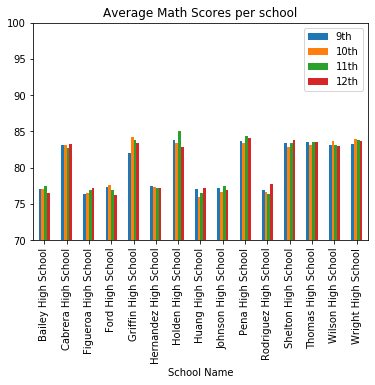

In [114]:
Math_Scores_by_Grade_df.plot(kind="bar", title="Average Math Scores per school", ylim=(70, 100))

In [17]:
# Calculate average reading scores for grade 9
# Make a copy of students_df
students8_df = students_df.copy()

# Reduce columns
students8_df = students8_df[["grade", "school_name", "reading_score"]]

#Rename columns
students8_df.rename(columns={"school_name": "School Name"}, inplace=True)

# Filter for only grade 9
students8_df = students8_df.loc[students8_df["grade"] == "9th",:]

# Remove grade column
del students8_df["grade"]

# Groupby School Name
students8_df = students8_df.groupby(["School Name"]).mean()

# Rename columns
students8_df.rename(columns={"reading_score": "9th"}, inplace=True)

In [18]:
# Calculate average reading scores for grade 10
# Make a copy of students_df
students9_df = students_df.copy()

# Reduce columns
students9_df = students9_df[["grade", "school_name", "reading_score"]]

# Rename columns
students9_df.rename(columns={"school_name": "School Name"}, inplace=True)

# Filter for only grade 10
students9_df = students9_df.loc[students9_df["grade"] == "10th",:]

# Remove grade column
del students9_df["grade"]

# Groupby School Name
students9_df = students9_df.groupby(["School Name"]).mean()

# Rename Columns
students9_df.rename(columns={"reading_score": "10th"}, inplace=True)

# Merge average reading scores for grade 9 and 10
Reading_Scores_by_Grade_df = pd.merge(students8_df, students9_df, on="School Name")

In [19]:
# Calculate average reading score for grades 11
# Make a copy of students_df
students10_df = students_df.copy()

# Reduce columns
students10_df = students10_df[["grade", "school_name", "reading_score"]]

# Rename columns
students10_df.rename(columns={"school_name": "School Name"}, inplace=True)

# Filter for only grade 11
students10_df = students10_df.loc[students10_df["grade"] == "11th",:]

# Remove grade column
del students10_df["grade"]

# Groupby School Name
students10_df = students10_df.groupby(["School Name"]).mean()

# Rename columns
students10_df.rename(columns={"reading_score": "11th"}, inplace=True)

# Merge average reading scores for grades 9 and 10 and 11
Reading_Scores_by_Grade_df = pd.merge(Reading_Scores_by_Grade_df, students10_df, on="School Name")


In [20]:
# Calculate average reading scores for grade 12
# Make a copy of students_df
students11_df = students_df.copy()

# Reduce columns
students11_df = students11_df[["grade", "school_name", "reading_score"]]

# Rename columns
students11_df.rename(columns={"school_name": "School Name"}, inplace=True)

# Filter for only grade 12
students11_df = students11_df.loc[students11_df["grade"] == "12th",:]

# Remve grade column
del students11_df["grade"]

# Groupby School Name
students11_df = students11_df.groupby(["School Name"]).mean()

# Rename columns
students11_df.rename(columns={"reading_score": "12th"}, inplace=True)

# Merge average reading scores for grades 9, 10, and 11 and 12
Reading_Scores_by_Grade_df = pd.merge(Reading_Scores_by_Grade_df, students11_df, on="School Name")

# List average reading scores for grades 9, 10, 11, 12
Reading_Scores_by_Grade_df

,9th,10th,11th,12th
School Name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


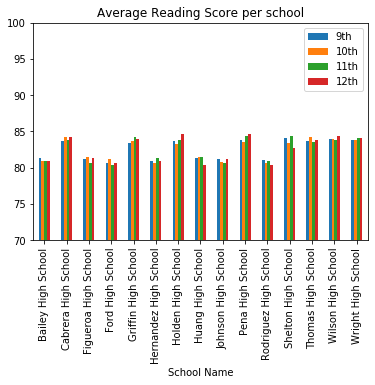

In [115]:
Reading_Scores_by_Grade_df.plot(kind="bar", title="Average Reading Score per school", ylim=(70,100))

In [38]:
# Set bins for spending amounts
bins=[570, 594.9, 619.9, 644.9, 670]
group_names = ["low Spending", "mid-low Spending",
               "mid-high Spending", "high Spending"]

# Make a copy of schools2_df
schools3_df = schools2_df.copy()

# Divide schools by Per Student Budget amount
schools3_df["School Spending"] = pd.cut(schools3_df["Per Student Budget"], bins, labels=group_names,
                                              include_lowest=True)

# Make a copy of schools3_df
total_students_df = schools3_df.copy()

# Reduce columns
total_students_df = total_students_df[["School Spending", "Total Students"]]

# Groupby School Spending
total_students_df = total_students_df.groupby(["School Spending"])
total_students_df = total_students_df.sum()

# Make a copy of students_df
students12_df = students_df.copy()

# Rename columns
students12_df.rename(columns={"school_name": "School Name"}, inplace=True)

# Merge schools3_df and students12_df
Scores_by_School_Spending_df = pd.merge(schools3_df, students12_df, on="School Name")

# Reduce columns
Scores_by_School_Spending_df = Scores_by_School_Spending_df[["School Name", "School Spending",
                                                             "reading_score", "math_score"]]

# Calculate percent passing math
Passing_math_2 = Scores_by_School_Spending_df["School Spending"][Scores_by_School_Spending_df["math_score"] >= 70].value_counts().rename_axis("School Spending").reset_index(name = "Passingmath_b")

# Calculate percent passing reading
Passing_reading_2 = Scores_by_School_Spending_df["School Spending"][Scores_by_School_Spending_df["reading_score"] >= 70].value_counts().rename_axis("School Spending").reset_index(name = "Passingreading_b")

# Groupby School Spending
Scores_by_School_Spending_df = Scores_by_School_Spending_df.groupby(["School Spending"]).mean()

# Rename columns
Scores_by_School_Spending_df = Scores_by_School_Spending_df.rename(columns={"reading_score":"Average Reading Score",
                                                                            "math_score":"Average Math Score"})

# Merge total students and average reading and math scores
Scores_by_School_Spending_df = pd.merge(total_students_df, Scores_by_School_Spending_df, on="School Spending")

# Merge total students, average reading and math scores and number of students passing math
Scores_by_School_Spending_df = pd.merge(Scores_by_School_Spending_df, Passing_math_2, on="School Spending")

# Calculate the percent of students passing math
Scores_by_School_Spending_df["% Passing Math"] = (Scores_by_School_Spending_df["Passingmath_b"] / Scores_by_School_Spending_df["Total Students"]) * 100

# Merge the total students, average reading and math scores, percent passing math and number of students passing reading
Scores_by_School_Spending_df = pd.merge(Scores_by_School_Spending_df, Passing_reading_2, on="School Spending")

# Calculate the percent of students passing reading
Scores_by_School_Spending_df["% Passing Reading"] = (Scores_by_School_Spending_df["Passingreading_b"] / Scores_by_School_Spending_df["Total Students"]) * 100

# Remove total students, number of students passing reading and number of students passing math columns
Scores_by_School_Spending_df.drop(["Total Students", "Passingmath_b", "Passingreading_b"], axis=1, inplace=True)

# Calculate average passing rate
Scores_by_School_Spending_df["Overall Passing Rate"] = (Scores_by_School_Spending_df["% Passing Math"] + Scores_by_School_Spending_df["% Passing Reading"]) / 2

# Reorder columns
Scores_by_School_Spending_df = Scores_by_School_Spending_df.reindex(columns=["School Spending", "Average Math Score",
                                                                             "Average Reading Score", "% Passing Math",
                                                                             "% Passing Reading", "Overall Passing Rate"])

# Set index to School Spending
Scores_by_School_Spending_df = Scores_by_School_Spending_df.set_index("School Spending")

# List average math and reading scores, percent passing math and reading, and average passing rate by School Spending
Scores_by_School_Spending_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Spending,,,,,
low Spending,83.363065,83.964039,93.702889,96.686558,95.194724
mid-low Spending,83.529196,83.838414,94.124128,95.886889,95.005509
mid-high Spending,78.061635,81.434088,71.400428,83.614770,77.507599
high Spending,77.049297,81.005604,66.230813,81.109397,73.670105


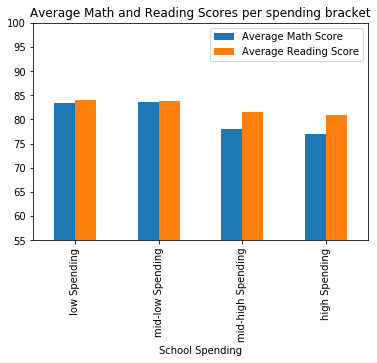

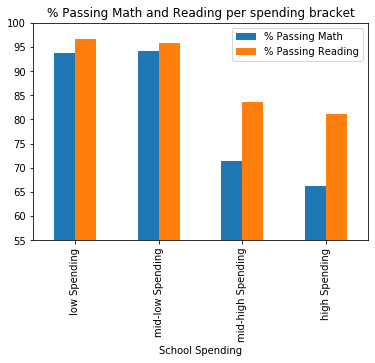

In [128]:
Scores_by_School_Spending_df.plot(kind="bar", y=["Average Math Score", "Average Reading Score"],
                                  title="Average Math and Reading Scores per spending bracket", ylim=(55,100))
Scores_by_School_Spending_df.plot(kind="bar", y=["% Passing Math", "% Passing Reading"],
                                  title="% Passing Math and Reading per spending bracket", ylim=(55,100))

In [37]:
# Set bins for number of students
bins_2 = [420, 1939.9, 3459.9, 4980]
group_names_2 = ["Small", "Medium", "Large"]

# Make a copy of schools2_df
schools4_df = schools2_df.copy()

# Divide schools by number of total students
schools4_df["School Size"] = pd.cut(schools4_df["Total Students"], bins_2, labels=group_names_2,
                                    include_lowest=True)

# Make a copy of schools4_df
total_students_2_df = schools4_df.copy()

# Reduce columns
total_students_2_df = total_students_2_df[["Total Students", "School Size"]]

# Groupby School Size
total_students_2_df = total_students_2_df.groupby(["School Size"])
total_students_2_df = total_students_2_df.sum()

# Make a copy of students_df
students13_df = students_df.copy()

# Rename Columns
students13_df.rename(columns={"school_name": "School Name"}, inplace=True)

# Merge schools4_df and students13_df
Scores_by_School_Size_df = pd.merge(schools4_df, students13_df, on="School Name")

# Reduce columns
Scores_by_School_Size_df = Scores_by_School_Size_df[["School Name", "School Size",
                                                     "reading_score", "math_score"]]

# Calculate the number of students passing math
Passing_math_3 = Scores_by_School_Size_df["School Size"][Scores_by_School_Size_df["math_score"] >= 70].value_counts().rename_axis("School Size").reset_index(name="Passingmath_c")

# Calculate the number of students passing reading
Passing_reading_3 = Scores_by_School_Size_df["School Size"][Scores_by_School_Size_df["reading_score"] >= 70].value_counts().rename_axis("School Size").reset_index(name="Passingreading_c")

# Groupby School Size
Scores_by_School_Size_df = Scores_by_School_Size_df.groupby(["School Size"]).mean()

# Rename columns
Scores_by_School_Size_df = Scores_by_School_Size_df.rename(columns={"reading_score": "Average Reading Score",
                                                                    "math_score": "Average Math Score"})

# Merge total students and average reading and math scores
Scores_by_School_Size_df = pd.merge(total_students_2_df, Scores_by_School_Size_df, on="School Size")

# Merge total students, average reading and math scores and number of students passing math
Scores_by_School_Size_df = pd.merge(Scores_by_School_Size_df, Passing_math_3, on="School Size")

# Calculate the percent of students passing math
Scores_by_School_Size_df["% Passing Math"] = (Scores_by_School_Size_df["Passingmath_c"] / Scores_by_School_Size_df["Total Students"]) * 100

# Merge total students, average reading and math scores, number of students and percent passing math and number of students passing reading
Scores_by_School_Size_df = pd.merge(Scores_by_School_Size_df, Passing_reading_3, on="School Size")

# Calculate the percent of students passing reading
Scores_by_School_Size_df["% Passing Reading"] = (Scores_by_School_Size_df["Passingreading_c"] / Scores_by_School_Size_df["Total Students"]) * 100

# Remove total students, number of students passing math an number of students passing reading columns
Scores_by_School_Size_df.drop(["Total Students", "Passingmath_c", "Passingreading_c"], axis=1, inplace=True)

# Calculate average passing rate
Scores_by_School_Size_df["Overall Passing Rate"] = (Scores_by_School_Size_df["% Passing Math"] + Scores_by_School_Size_df["% Passing Reading"]) / 2

# Reorder columns
Scores_by_School_Size_df = Scores_by_School_Size_df.reindex(columns=["School Size", "Average Math Score",
                                                                     "Average Reading Score", "% Passing Math",
                                                                     "% Passing Reading", "Overall Passing Rate"])

# Set index to School Size
Scores_by_School_Size_df = Scores_by_School_Size_df.set_index("School Size")

# List average reading and math scores, percent passing math and reading and average passing rate by School Size
Scores_by_School_Size_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
School Size,,,,,
Small,83.436586,83.882857,93.663606,96.670366,95.166986
Medium,78.164034,81.654758,72.336517,83.844600,78.090558
Large,77.070764,80.928365,66.468891,81.106091,73.787491
